In [1]:
import pandas as pd
import torch

In [2]:
##pip install torch

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cpu



In [3]:
df = pd.read_csv('./pima-indians-diabetes.csv')
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetespedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetespedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(768, 9)

In [6]:
#split data into train and test using sklearn it's so easy :)
from sklearn.model_selection import train_test_split 
features=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetespedigreeFunction', 'Age']]
label=df["Outcome"]

x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=42)

In [7]:
print(f" the length of data for traing is : {len(x_train)}")

print(f"the length of data for test  is :{len(x_test)}")

 the length of data for traing is : 614
the length of data for test  is :154


In [8]:
x_train1=df[:450]
y_train1=df[:450]
x_test1=df[450:]
y_test1=df[450:]
print(f" the length of data for traing is : {len(x_train1)}")

print(f" the length of data for test  is :{len(x_test1)}")

 the length of data for traing is : 450
 the length of data for test  is :318


In [9]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
import numpy as np
x_train=np.array(x_train)
y_train=np.array(y_train)

x_test=np.array(x_test)
y_test=np.array(y_test)

print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
#torch.tensor.detach().numpy()
#x_train = torch.tensor(x_train, dtype=torch.float32).detach().numpy()
#y_train = torch.tensor(y_train, dtype=torch.long).detach().numpy()
#x_test = torch.tensor(x_test, dtype=torch.float32).detach().numpy()
#y_test = torch.tensor(y_test, dtype=torch.long).detach().numpy()
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [12]:
print((x_train.shape))
print((y_train.shape))
print((x_test.shape))
print((y_test.shape))

torch.Size([614, 8])
torch.Size([614])
torch.Size([154, 8])
torch.Size([154])


In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(0)

# Here's a simple MLP
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(8, 5)
        self.fc2 = nn.Linear(5, 3)
        self.fc3 = nn.Linear(3, 2)

    def forward(self, x):
        x = x.flatten(1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x
mlp=SimpleMLP()

In [14]:
list(mlp.parameters())

[Parameter containing:
 tensor([[-0.0026,  0.1897, -0.2910, -0.2602, -0.1362,  0.0948, -0.0070,  0.2803],
         [-0.0314,  0.0936, -0.1068, -0.0695, -0.3378, -0.2342, -0.1457,  0.0131],
         [ 0.1398,  0.2121, -0.2397, -0.1540,  0.1284,  0.2936, -0.0728,  0.2646],
         [-0.0570,  0.0374,  0.3201, -0.3280, -0.2226, -0.0895, -0.1378,  0.3055],
         [-0.2292, -0.1628, -0.2470, -0.3311, -0.2064,  0.3039,  0.1578,  0.1714]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0186, -0.1813,  0.0598, -0.3301, -0.2555], requires_grad=True),
 Parameter containing:
 tensor([[-0.2306,  0.2822,  0.2622, -0.1983, -0.0161],
         [ 0.2860,  0.4446,  0.1775,  0.0604,  0.2999],
         [-0.2633,  0.0833, -0.3467, -0.3100, -0.2310]], requires_grad=True),
 Parameter containing:
 tensor([ 0.2024,  0.1799, -0.2649], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1744,  0.3169, -0.0729],
         [ 0.0220,  0.1338,  0.3582]], requires_grad=True),
 Parameter contain

In [15]:
# create a loss function 
loss_fn=nn.CrossEntropyLoss()
# create optimizer
optimizer=torch.optim.Adam(params=mlp.parameters(),lr=0.001) #lr is a hyperparameter

In [16]:
def TrainMlp(model,x_train,y_train,criterion,optimizer):
    running_loss=0.0
    running_correct=0.0
    model.train()
    outputs=model(x_train)
    loss=criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    _,preds=torch.max(outputs,1)
    running_loss+=loss.item()*x_train.size(0)
    running_correct+=torch.sum(preds==y_train.data)
    epoch_loss=running_loss/len(x_train)
    epoch_acc=running_correct/len(x_train)
    return epoch_acc, epoch_loss

epoch_acc, epoch_loss = TrainMlp(mlp, x_train, y_train, nn.CrossEntropyLoss(), optimizer)

In [17]:
def testMlp(model,x_test,y_test,criterion,optimizer):
  model.eval()
  running_loss=0.0
  running_correct=0.0
  outputs=model(x_test)
  loss=criterion(outputs,y_test)
  _,preds=torch.max(outputs,1)
  running_loss+=loss.item()*x_test.size(0)
  running_correct+=torch.sum(preds==y_test.data)
  epoch_loss=running_loss/ len(x_test)
  epoch_acc=running_correct/ len(x_test)
  return epoch_acc,epoch_loss

In [18]:
epochs=600
final_losses=[]
final_accuarcy=[]
preds=[]
test_losses=[]
test_accuracy=[]
for epoch in range(epochs):
  epoch=epoch+1
  epoch_acc,epoch_loss=TrainMlp(mlp,x_train,y_train,loss_fn,optimizer)
  final_losses.append(epoch_loss)
  final_accuarcy.append(epoch_acc)

  test_acc,test_loss=testMlp(mlp,x_test,y_test,loss_fn,optimizer)
  test_losses.append(test_loss)
  test_accuracy.append(test_acc)
  if epoch % 50 == 1:
    print(f" Epoch number : {epoch}  the loss :  {epoch_loss :.4f} | and the accuarcy : {100 *epoch_acc :.2f}")

   

print(f" the accuarcy : {100 *epoch_acc :.2f}")

 Epoch number : 1  the loss :  1.4793 | and the accuarcy : 65.31
 Epoch number : 51  the loss :  0.7682 | and the accuarcy : 65.31
 Epoch number : 101  the loss :  0.6742 | and the accuarcy : 65.31
 Epoch number : 151  the loss :  0.6548 | and the accuarcy : 65.31
 Epoch number : 201  the loss :  0.6504 | and the accuarcy : 65.31
 Epoch number : 251  the loss :  0.6484 | and the accuarcy : 65.31
 Epoch number : 301  the loss :  0.6472 | and the accuarcy : 65.31
 Epoch number : 351  the loss :  0.6465 | and the accuarcy : 65.31
 Epoch number : 401  the loss :  0.6460 | and the accuarcy : 65.31
 Epoch number : 451  the loss :  0.6457 | and the accuarcy : 65.31
 Epoch number : 501  the loss :  0.6454 | and the accuarcy : 65.31
 Epoch number : 551  the loss :  0.6452 | and the accuarcy : 65.31
 the accuarcy : 65.31


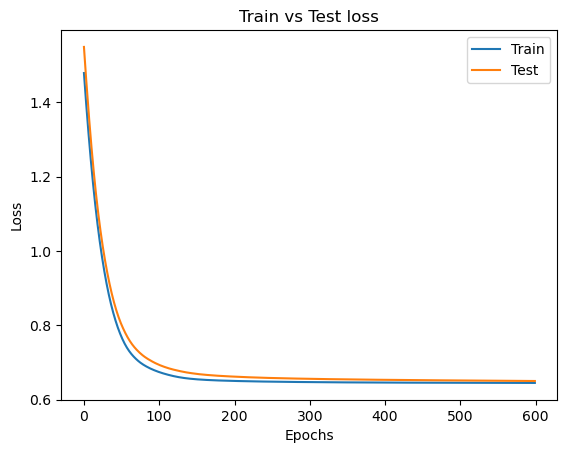

In [19]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), final_losses ,)
plt.plot(range(epochs), test_losses ,)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train", "Test"])
plt.title('Train vs Test loss')
plt.show()

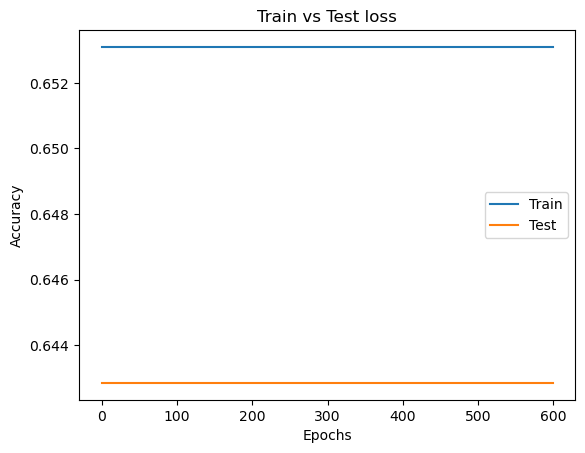

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(epochs), final_accuarcy ,)
plt.plot(range(epochs), test_accuracy ,)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])
plt.title('Train vs Test loss')
plt.show()

In [23]:
predictions = mlp(x_test)

#predictions.detach()

In [25]:
conf = confusion_matrix(y_test, predictions)


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.